In [1]:
# dataset package 호출 
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

In [2]:
# data load
boston_houseprice_data = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
# DataFrame 생성
df = pd.DataFrame(
    data = boston_houseprice_data.data,
    columns = boston_houseprice_data.feature_names
)

In [4]:
# 출력 소수점 이하 3자리로 제한 
%precision 3
pd.set_option('precision', 3)

In [5]:
# 데이터 a
score_a = [42, 69, 56, 41, 57, 48, 65, 49, 65, 58]
df_score_a = pd.DataFrame(score_a)

In [6]:
# 데이터 b
score_b = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
df_score_b = pd.DataFrame(score_b)

## 시각화
- describe() 함수로 평균, 분산, 사분위수 등의 지표로 데이터의 중심이나 산포도를
파악

- 대표적인 시각화 방법: 도수분포표, 히스토그램, 상자그림


In [7]:
freq, range = np.histogram(df_score_a, bins = 10, range = (0,100))

In [8]:
freq

array([0, 0, 0, 0, 4, 3, 3, 0, 0, 0])

### 도수분포표 (Frequency Distribution)
- 데이터 값을 몇 개의 구간으로 나누고, 구간에 몇 개의 데이터가 포함되는지 세는 방법

- 즉, 분할된 구간과 데이터의 개수를 표로 정리한 것

In [9]:
freq, range = np.histogram(df_score_a, bins = 10, range = (0, 100))

In [10]:
freq

array([0, 0, 0, 0, 4, 3, 3, 0, 0, 0])

In [11]:
range

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [12]:
np.arange(0, 100, 10)

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [13]:
# 0 ~ 10, 10 ~ 20,,,90 ~ 100
freq_class = [f' {i} - { i+10 }' for i in np.arange(0, 100, 10)]

In [14]:
freq_class

[' 0 - 10',
 ' 10 - 20',
 ' 20 - 30',
 ' 30 - 40',
 ' 40 - 50',
 ' 50 - 60',
 ' 60 - 70',
 ' 70 - 80',
 ' 80 - 90',
 ' 90 - 100']

#### 도수분포표 
- 점수 분포 쉽게 확인
- 계급과 도수 이외 계급값, 상대도수, 누적상대도수 자주 사용

In [26]:
# freq_class를 index로 설정하여 DataFrame 작성
freq_dist_df = pd.DataFrame(
    {'frequency':freq}, 
    index=pd.Index(
        freq_class,
        name='class'
    )
)

In [22]:
freq_dist_df

,frequence
class,
0 - 10,0
10 - 20,0
20 - 30,0
30 - 40,0
40 - 50,4
50 - 60,3
60 - 70,3
70 - 80,0
80 - 90,0


In [23]:
# 각 계급(class) 대표하는 값으로 중앙값 이용 (50 - 60이면 계급값 55)
class_value = [(i+(i+10))//2 for i in np.arange(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [24]:
freq_dist_df['class_value'] = class_value

In [27]:
# 상대도수 - 해당 계급 데이터가 전체 데이터에서 얼마나 비율 차지하는지
freq_dist_df['frequency'] / freq_dist_df['frequency'].sum()

class
 0 - 10      0.0
 10 - 20     0.0
 20 - 30     0.0
 30 - 40     0.0
 40 - 50     0.4
 50 - 60     0.3
 60 - 70     0.3
 70 - 80     0.0
 80 - 90     0.0
 90 - 100    0.0
Name: frequency, dtype: float64

In [28]:
freq_dist_df['relative frequency'] = freq_dist_df['frequency'] / freq_dist_df['frequency'].sum()

In [29]:
freq_dist_df['cumulative relative frequency'] = freq_dist_df['frequency'].cumsum() / freq_dist_df['frequency'].sum()

In [30]:
# 누적상대도수 
freq_dist_df

,frequency,relative frequency,cumulative relative frequency
class,,,
0 - 10,0,0.0,0.0
10 - 20,0,0.0,0.0
20 - 30,0,0.0,0.0
30 - 40,0,0.0,0.0
40 - 50,4,0.4,0.4
50 - 60,3,0.3,0.7
60 - 70,3,0.3,1.0
70 - 80,0,0.0,1.0
80 - 90,0,0.0,1.0


In [31]:
freq_dist_df.cumsum() / freq_dist_df.sum()

,frequency,relative frequency,cumulative relative frequency
class,,,
0 - 10,0.0,0.0,0.000
10 - 20,0.0,0.0,0.000
20 - 30,0.0,0.0,0.000
30 - 40,0.0,0.0,0.000
40 - 50,0.4,0.4,0.078
50 - 60,0.7,0.7,0.216
60 - 70,1.0,1.0,0.412
70 - 80,1.0,1.0,0.608
80 - 90,1.0,1.0,0.804


In [32]:
# 도수분포표 (계급값,상대도수,누적상대도수)
freq_dist_df

,frequency,relative frequency,cumulative relative frequency
class,,,
0 - 10,0,0.0,0.0
10 - 20,0,0.0,0.0
20 - 30,0,0.0,0.0
30 - 40,0,0.0,0.0
40 - 50,4,0.4,0.4
50 - 60,3,0.3,0.7
60 - 70,3,0.3,1.0
70 - 80,0,0.0,1.0
80 - 90,0,0.0,1.0


### 히스토그램 (Histogram)
- 도수분포표를 막대그래프로 나타낸 것

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

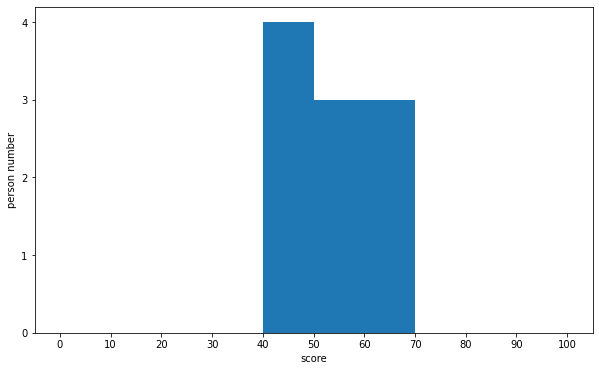

In [38]:
# 캔버스 생성 ( 가로 X 세로 사이즈 포함 )
fig = plt.figure(figsize=(10,6))

# 캔버스 위에 그릴 영역 지정 (nrows, ncols, index)
ax = fig.add_subplot(1, 1, 1)

# 계급수 10으로 히스토그램 그림
freq, _, _ = ax.hist(df_score_a.values, bins=10, range=(0, 100))

# X축, Y축에 Label 설정
ax.set_xlabel('score')
ax.set_ylabel('person number')

# X축을 0, 10, 20, ..., 100 눈금으로 구분
# Y축을 0, 1, 2, ... 눈금으로 구분
ax.set_xticks(np.linspace(0, 100, 10+1))
ax.set_yticks(np.arange(0, freq.max()+1))

# 그래프 표시
plt.show()

In [39]:
np.linspace(0, 100, 10+1)

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

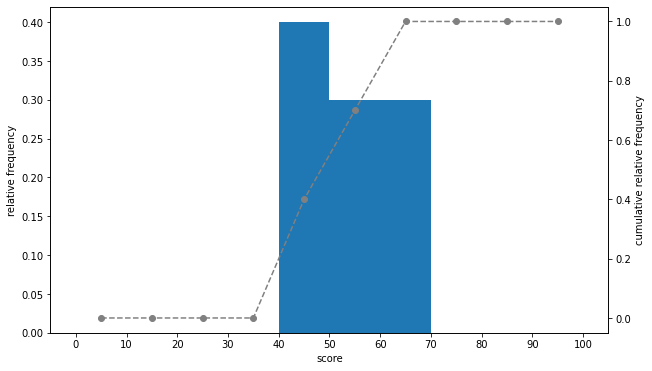

In [40]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(1, 1, 1)
# y축 스케일이 다른 그래프를 동일한 영역에 생성 
ax2 = ax1.twinx()

# 상대도수의 히스토그램 그림
weights = np.ones_like(df_score_a) / len(df_score_a)
rel_freq,_,_ = ax1.hist(
    df_score_a.values, bins = 10, range = (0, 100), weights = weights
)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i + (i+10))//2 for i in np.arange(0, 100, 10)]

# 꺾은선 그래프 그림
# ls = '--'는 점선으로 line을 그리는 것
# marker = 'o'는 데이터 점을 그리는 것
# color = 'gray'는 회색으로 선을 그리는 것
ax2.plot(
    class_value, cum_rel_freq,
    ls='--', marker='o', color = 'gray'
)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')

ax1.set_xticks(np.linspace(0, 100, 10+1))

# 그래프 표시
plt.show() 

#### 상자그림 (Box plot)
- 데이터의 산포도를 표현하는 그림
- 데이터의 분포와 이상값을 시각적으로 파악
- Q1, Q2, Q3, IQR을 사용해서 그래프를 그린다.
- 박스 바깥 가로선들은 이상값을 분리하는 기준,
아래는 Q1 - 1.5 X IQR, 위는 Q3 + 1.5 X IQR
- 경계 밖 데이터는 이상값으로 보면 된다

In [43]:
np.arange(0, 100, 10)

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [44]:
i = 0
(i+(i+10))//2

5

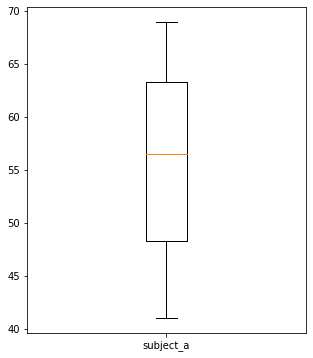

In [42]:
fig = plt.figure(figsize = (5, 6))
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(df_score_a.values, labels = ['subject_a'])
plt.show()

# -> 50점 중반 전후 점수 받은 학생이 많다. 약 70점 및 40점이 이상값 나누는 기준임을 확인